# Overriding a Mechanism in MusicBox

The MusicBox class only supports one mechanism at a time. If you desire to change the mechanism within the class, you will need to override it from scratch.

## 1. Creating the Mechanism and Box Model

This is simply a copy of the first half of the Basic Workflow Tutorial to set up the mechanism for overriding.

In [1]:
from acom_music_box import MusicBox, Conditions
import musica.mechanism_configuration as mc
import matplotlib.pyplot as plt

# Create each of the species that will be simulated
X = mc.Species(name="X")
Y = mc.Species(name="Y")
Z = mc.Species(name="Z")
species = {"X": X, "Y": Y, "Z": Z}
gas = mc.Phase(name="gas", species=list(species.values()))
# Create the reactions that the species undergo in the
arr1 = mc.Arrhenius(name="X->Y", A=4.0e-3, C=50, reactants=[species["X"]], products=[species["Y"]], gas_phase=gas)
arr2 = mc.Arrhenius(name="Y->Z", A=4.0e-3, C=50, reactants=[species["Y"]], products=[species["Z"]], gas_phase=gas)
rxns = {"X->Y": arr1, "Y->Z": arr2}
# Create the mechanism that is defined by the species, phases, and reactions
mechanism = mc.Mechanism(name="tutorial_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))
# Create the box model that contains the mechanism
box_model = MusicBox()
box_model.load_mechanism(mechanism)

## 2. Redefining Code

For the sake of readability, the code from the previous cells will be redefined here to represent the new mechanism.</br>
Here, a new type of reaction is used, called a quantum tunneling reaction:

In [2]:
# Create each of the species that will be simulated
G = mc.Species(name="G")
H = mc.Species(name="H")
species = {"G": G, "H": H}
gas = mc.Phase(name="gas", species=list(species.values()))
# Create the reactions that the species undergo in the
arr1 = mc.Tunneling(name="G->H", A=2.0e-3, B=2, C=50, reactants=[species["G"]], products=[species["H"]], gas_phase=gas)
arr2 = mc.Tunneling(name="H->G", A=9.0e-3, B=2, C=50, reactants=[species["H"]], products=[species["G"]], gas_phase=gas)
rxns = {"G->H": arr1, "H->G": arr2}
# Create the mechanism that is defined by the species, phases, and reactions
mechanism = mc.Mechanism(name="overriden_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))
# Create the box model that contains the new mechanism
box_model.load_mechanism(mechanism)

## 3. Running and Visualizing the new Box Model

The rest of this code is an adapted version of the Basic Workflow code to run with the new mechanism. Refer to there for explanations about the code:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.G.mol m-3,CONC.H.mol m-3
0,0.0,298.15,101325.0,40.874045,2.500000,5.000000
1,20.0,298.15,101325.0,40.874045,3.213819,4.286181
2,40.0,298.15,101325.0,40.874045,3.787516,3.712484
3,60.0,298.15,101325.0,40.874045,4.248595,3.251405
4,80.0,298.15,101325.0,40.874045,4.619165,2.880835
5,100.0,298.15,101325.0,40.874045,4.916991,2.583009
6,120.0,310.00,100100.0,38.836331,5.156409,2.343591
7,140.0,310.00,100100.0,38.836331,5.348819,2.151181
8,160.0,310.00,100100.0,38.836331,5.503449,1.996551
9,180.0,310.00,100100.0,38.836331,5.627719,1.872281


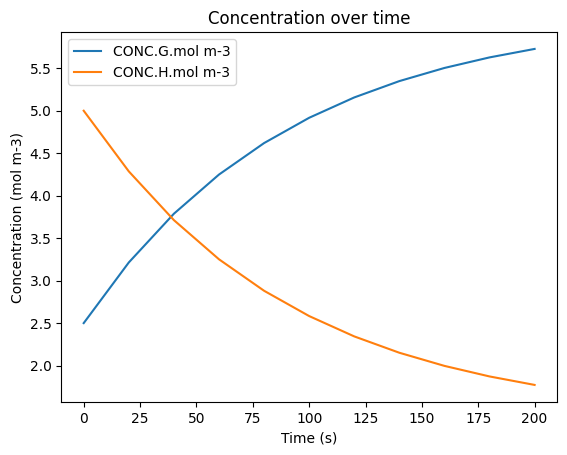

In [3]:
# Set the conditions of the box model at time = 0 s
box_model.initial_conditions = Conditions(
    temperature=298.15, # Units: Kelvin (K)
    pressure=101325.0, # Units: Pascals (Pa)
    species_concentrations={ # Units: mol/m^3
        "G": 2.5,
        "H": 5.0,
    }
)
# Set the box model conditions at the defined time
box_model.add_evolving_condition(
    100.0, # Units: Seconds (s)
    Conditions(
        temperature=310.0, # Units: Kelvin (K)
        pressure=100100.0 # Units: Pascals (Pa)
    )
)
# Set the additional configuration options for the box model
box_model.box_model_options.simulation_length = 200 # Units: Seconds (s)
box_model.box_model_options.chem_step_time = 1 # Units: Seconds (s)
box_model.box_model_options.output_step_time = 20 # Units: Seconds (s)

df = box_model.solve()
display(df)
df.plot(x='time.s', y=['CONC.G.mol m-3', 'CONC.H.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()